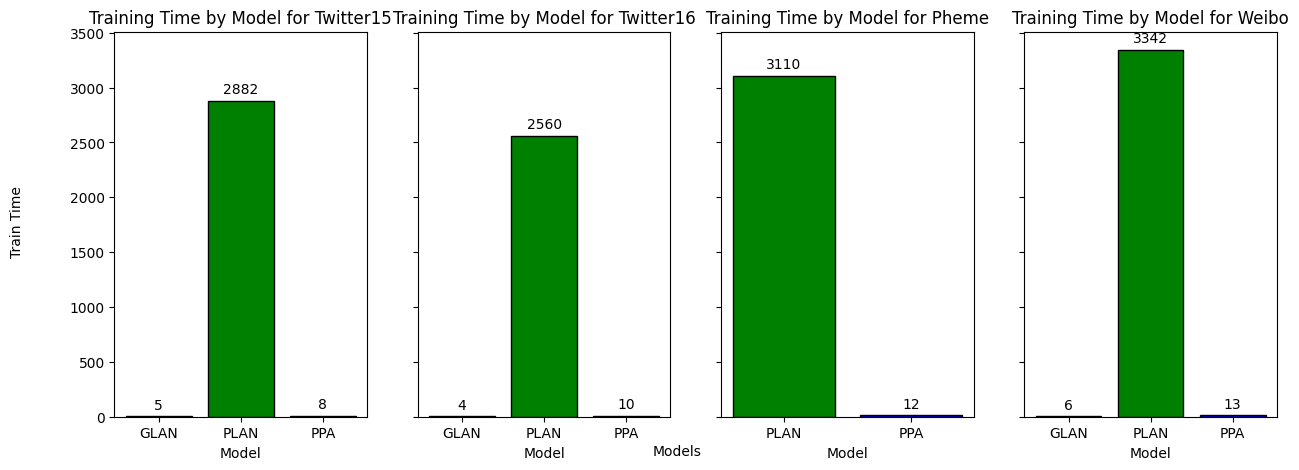

In [1]:
import matplotlib.pyplot as plt
import numpy as np

train_time = [5, 2882, 8, 4, 2560, 10, 3110, 12, 6, 3342, 13]
dataset = ["Twitter15", "Twitter15", "Twitter15", "Twitter16", "Twitter16", "Twitter16", "Pheme", "Pheme", "Weibo", "Weibo", "Weibo"]
model = ["GLAN", "PLAN", "PPA", "GLAN", "PLAN", "PPA", "PLAN", "PPA", "GLAN", "PLAN", "PPA"]

colors = {"GLAN": "red", "PLAN": "green", "PPA": "blue"}

datasets = ["Twitter15", "Twitter16", "Pheme", "Weibo"]
models = list(colors.keys())
x = np.arange(len(models))

fig, axs = plt.subplots(nrows=1, ncols=len(datasets), figsize=(15, 5), sharey=True)

for i, dataset_name in enumerate(datasets):
    if dataset_name == "Pheme":
        filtered_model = [m for m in models if m != "GLAN"]
        model_train_time = []
        for m in filtered_model:
            indices = [j for j in range(len(dataset)) if dataset[j] == dataset_name and model[j] == m]
            model_train_time.append(sum([train_time[k] for k in indices]))

        bars = axs[i].bar(x[:-1], model_train_time, color=[colors[m] for m in filtered_model], edgecolor='black', linewidth=1)
        axs[i].set_xticks(x[:-1])
        axs[i].set_xticklabels(filtered_model)
    else:
        model_train_time = []
        for m in models:
            indices = [j for j in range(len(dataset)) if dataset[j] == dataset_name and model[j] == m]
            model_train_time.append(sum([train_time[k] for k in indices]))

        bars = axs[i].bar(x, model_train_time, color=[colors[m] for m in models], edgecolor='black', linewidth=1)
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(models)

    axs[i].set_xlabel("Model")
    axs[i].set_title(f"Training Time by Model for {dataset_name}")

    for bar in bars:
        height = bar.get_height()
        axs[i].annotate(f'{height:.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

fig.text(0.5, 0.04, 'Models', ha='center', va='center')
fig.text(0.06, 0.5, 'Train Time', ha='center', va='center', rotation='vertical')

plt.show()


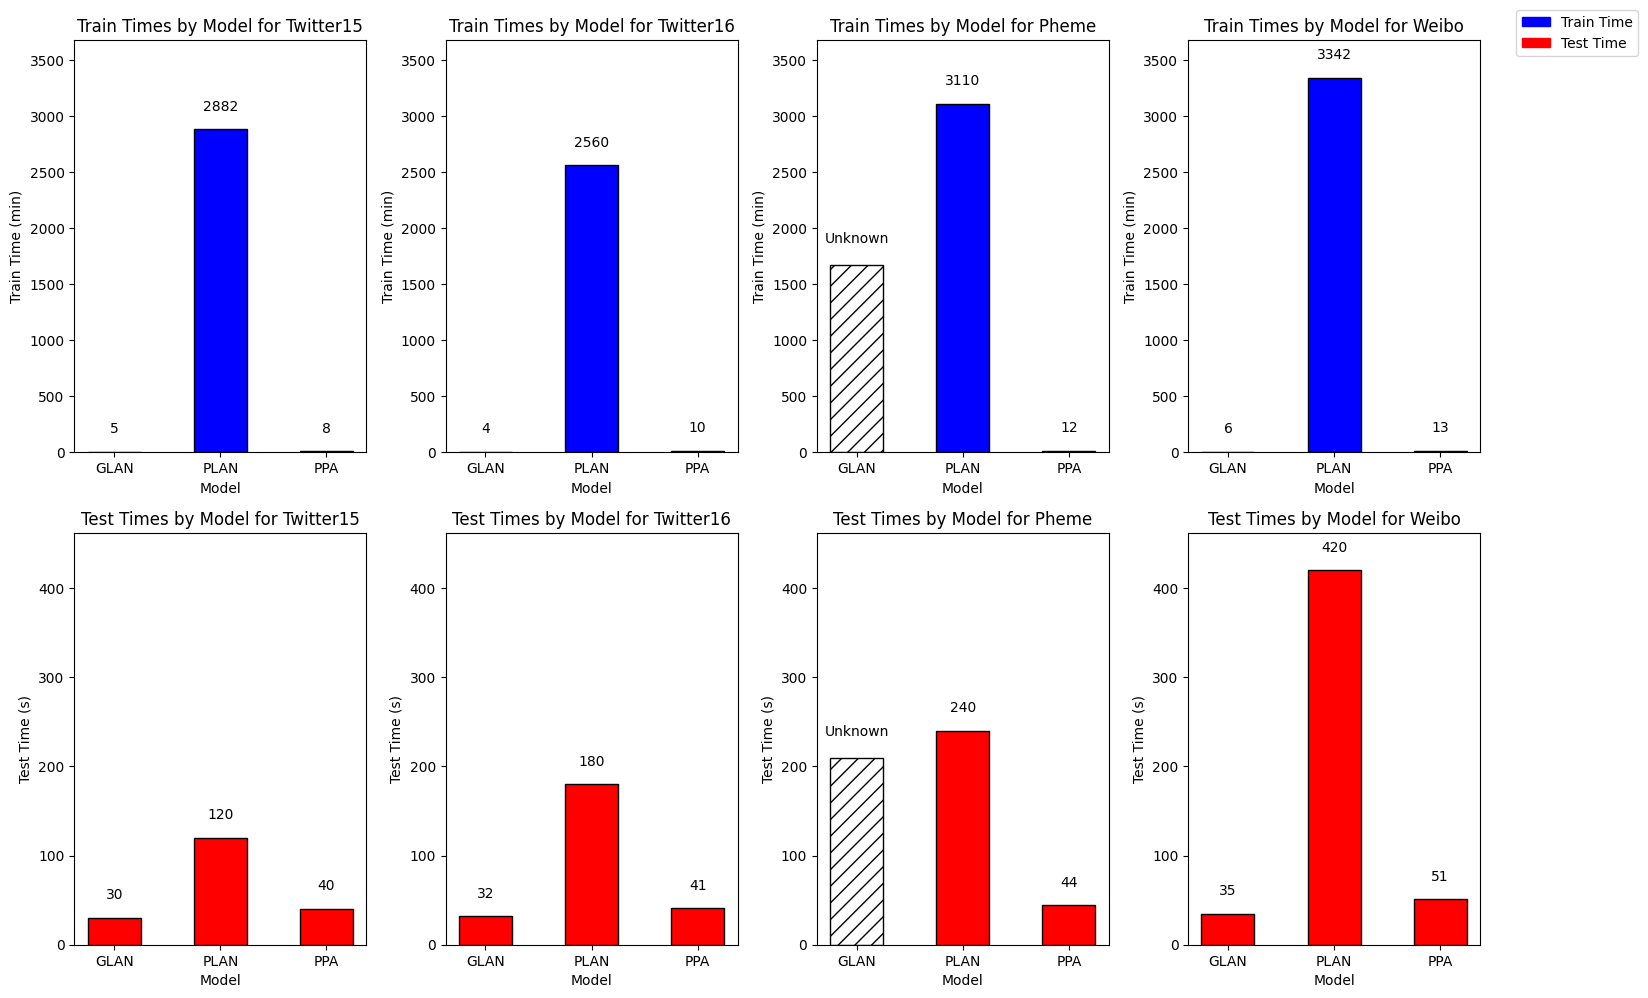

In [313]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

unknown_artist = patches.Patch(facecolor='none', edgecolor='black', hatch='//', label='Unknown')

train_artist = patches.Patch(color='blue', label='Train Time')
test_artist = patches.Patch(color='red', label='Test Time')
# Given data
train_time = [5, 2882, 8, 4, 2560, 10, 3110, 12, 6, 3342, 13]
test_time = [30, 120, 40, 32, 180, 41, 240, 44, 35, 420, 51]
dataset = ["Twitter15", "Twitter15", "Twitter15", "Twitter16", "Twitter16", "Twitter16", "Pheme", "Pheme", "Weibo", "Weibo", "Weibo"]
model = ["GLAN", "PLAN", "PPA", "GLAN", "PLAN", "PPA", "PLAN", "PPA", "GLAN", "PLAN", "PPA"]

# Predefined order of models
model_order = ["GLAN", "PLAN", "PPA"]

# Other parameters
width = 0.5
datasets = ["Twitter15", "Twitter16", "Pheme", "Weibo"]

# Prepare the subplots
fig, axs = plt.subplots(nrows=2, ncols=len(datasets), figsize=(15, 10))

# Determine the global y-axis limits for train and test times
global_train_max = max(train_time)
global_test_max = max(test_time)

for i, dataset_name in enumerate(datasets):
    for j, model_name in enumerate(model_order):
        # Identify indices for the given dataset-model combination
        indices = [k for k in range(len(dataset)) if dataset[k] == dataset_name and model[k] == model_name]

        # If no indices are found, plot a dashed line at half maximum y-value

        if not indices:
                rect = patches.Rectangle((j - 0.5 * width, 0), width, global_train_max / 2,
                                         facecolor='none', edgecolor='black', hatch='//')
                axs[0, i].add_patch(rect)
                axs[0, i].text(j, global_train_max / 2 + 0.05 * global_train_max, 'Unknown', ha='center', va='bottom')

                rect = patches.Rectangle((j - 0.5 * width, 0), width, global_test_max / 2,
                                         facecolor='none', edgecolor='black', hatch='//')
                axs[1, i].add_patch(rect)
                axs[1, i].text(j, global_test_max / 2 + 0.05 * global_test_max, 'Unknown', ha='center', va='bottom')
                continue


        # Sum the train and test times
        total_train_time = sum(train_time[k] for k in indices)
        total_test_time = sum(test_time[k] for k in indices)

        # Plot the train and test times
        axs[0, i].bar(j, total_train_time, width, color='blue', edgecolor='black', linewidth=1)
        axs[0, i].text(j, total_train_time + 0.05 * global_train_max, f"{total_train_time}", ha='center')

        axs[1, i].bar(j, total_test_time, width, color='red',edgecolor='black', linewidth=1)
        axs[1, i].text(j, total_test_time + 0.05 * global_test_max, f"{total_test_time}", ha='center')

    # Set the x-ticks and labels
    axs[0, i].set_xticks(range(len(model_order)))
    axs[0, i].set_xticklabels(model_order)
    axs[1, i].set_xticks(range(len(model_order)))
    axs[1, i].set_xticklabels(model_order)

    # Set the y-limits to be the same across subplots
    axs[0, i].set_ylim(0, global_train_max + 0.1 * global_train_max)  # Add 10% padding
    axs[1, i].set_ylim(0, global_test_max + 0.1 * global_test_max)  # Add 10% padding

    # Set other labels and titles
    axs[0, i].set_xlabel("Model")
    axs[0, i].set_ylabel("Train Time (min)")
    axs[0, i].set_title(f"Train Times by Model for {dataset_name}")
    axs[1, i].set_xlabel("Model")
    axs[1, i].set_ylabel("Test Time (s)")
    axs[1, i].set_title(f"Test Times by Model for {dataset_name}")

# Adjust layout for better spacing
fig.tight_layout()

fig.legend(handles=[train_artist, test_artist], loc='upper right', bbox_to_anchor=(1.1, 1))



# Show the plot
plt.savefig('my_figure.jpg', dpi=300, bbox_inches='tight')

plt.show()




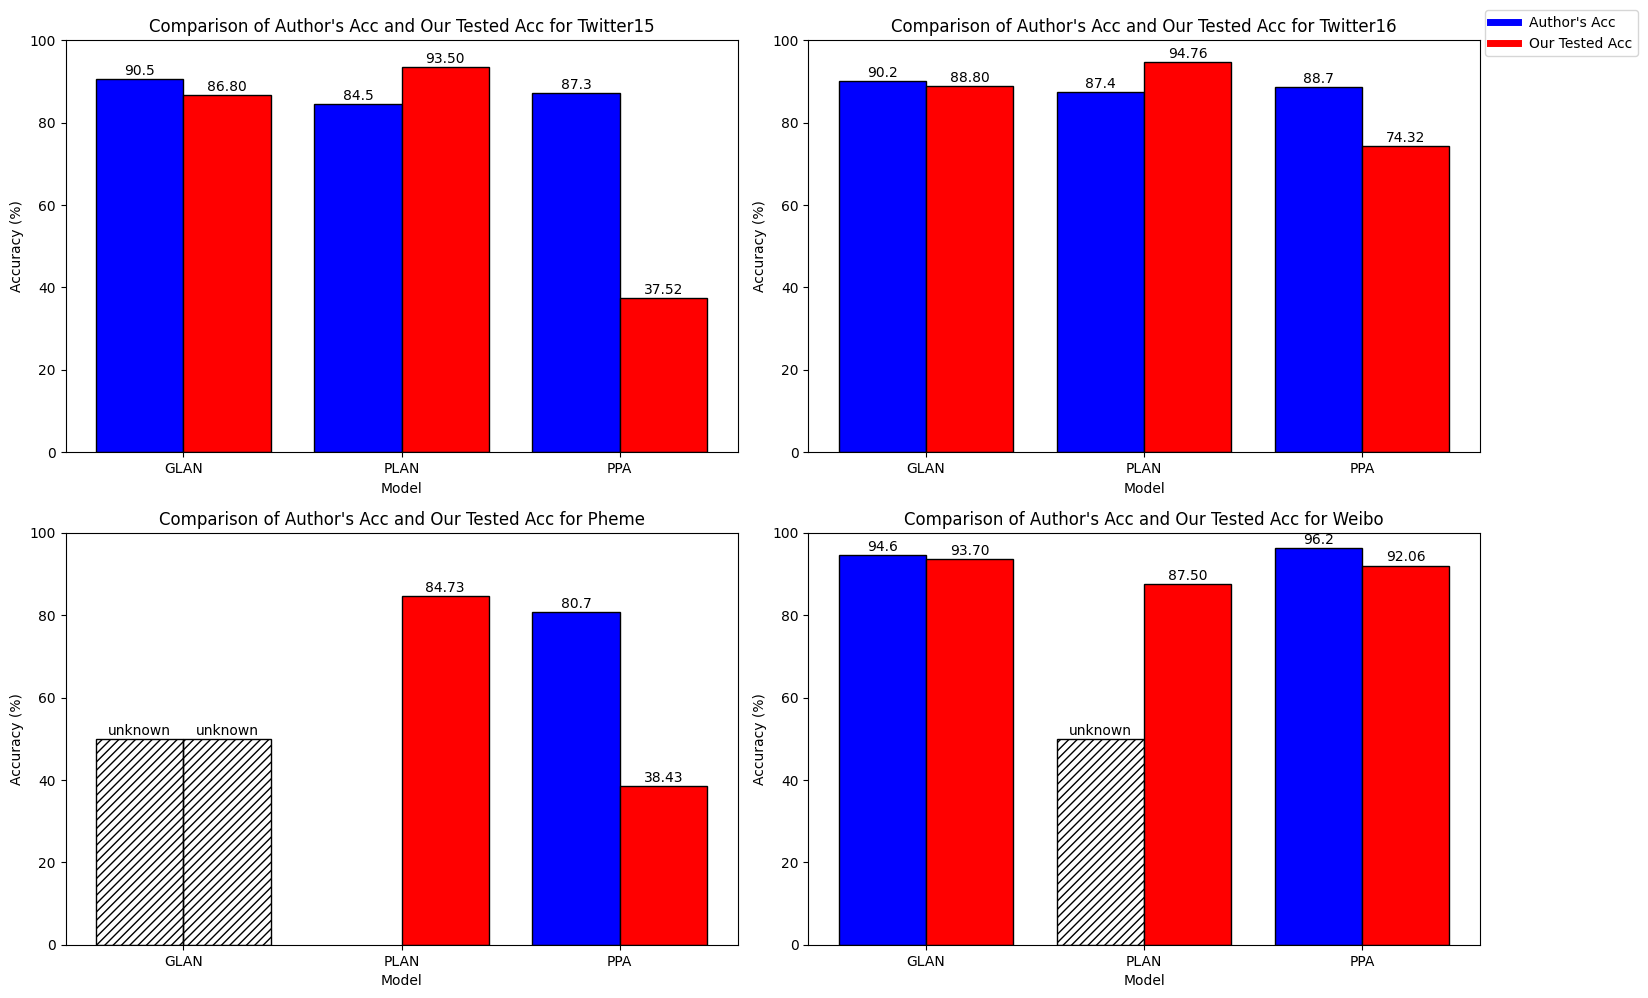

In [315]:
import matplotlib.pyplot as plt
import numpy as np

in_essay_acc = [90.5, 84.5, 87.3, 90.2, 87.4, 88.7, None, 80.7, 94.6, 96.2, None]
our_test_acc = [86.8, 93.5, 37.52, 88.8, 94.76, 74.32, 84.73, 38.43, 93.7, 92.06, 87.50]
dataset = ["Twitter15", "Twitter15", "Twitter15", "Twitter16", "Twitter16", "Twitter16", "Pheme", "Pheme", "Weibo", "Weibo", "Weibo"]
model = ["GLAN", "PLAN", "PPA", "GLAN", "PLAN", "PPA", "PLAN", "PPA", "GLAN", "PPA", "PLAN"]

width = 0.4

datasets = ["Twitter15", "Twitter16", "Pheme", "Weibo"]
models = list(set(model))
x = np.arange(len(models))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, dataset_name in enumerate(datasets):
    model_in_essay_acc = []
    model_our_test_acc = []
    for m in models:
        if dataset_name == "Pheme" and m == "GLAN" or dataset_name == "Weibo" and m == "PLAN":
            model_in_essay_acc.append(None)
            model_our_test_acc.append(None)
            continue
        acc_indices = [j for j in range(len(dataset)) if dataset[j] == dataset_name and model[j] == m]

        in_essay_acc_vals = [in_essay_acc[k] for k in acc_indices if in_essay_acc[k] is not None]
        our_test_acc_vals = [our_test_acc[k] for k in acc_indices if our_test_acc[k] is not None]

        if in_essay_acc_vals:  # Check if the list is not empty
            model_in_essay_acc.append(sum(in_essay_acc_vals) / len(in_essay_acc_vals))
        else:
            model_in_essay_acc.append(None)

        if our_test_acc_vals:  # Check if the list is not empty
            model_our_test_acc.append(sum(our_test_acc_vals) / len(our_test_acc_vals))
        else:
            model_our_test_acc.append(None)

    row = i // 2
    col = i % 2

# Create the In Essay Acc bar chart
    for j, in_essay_acc_val in enumerate(model_in_essay_acc):
        if in_essay_acc_val is not None:
            axs[row, col].bar(x[j] - width/2, in_essay_acc_val, width, color='blue', edgecolor='black', linewidth=1)
            axs[row, col].text(x[j] - width/2, in_essay_acc_val + 1, f"{in_essay_acc_val:.1f}", ha='center')
        elif dataset_name == "Weibo" and models[j] == "PLAN":
            axs[row, col].bar(x[j] - width/2, 50, width, color='none', edgecolor='black', linewidth=1, hatch='////')
            axs[row, col].text(x[j] - width/2, 50 + 1, 'unknown', ha='center')

# Create the Our Test Acc bar chart
    for j, our_test_acc_val in enumerate(model_our_test_acc):
        if our_test_acc_val is not None:
            axs[row, col].bar(x[j] + width/2, our_test_acc_val, width, color='red', edgecolor='black', linewidth=1)
            axs[row, col].text(x[j] + width/2, our_test_acc_val + 1, f"{our_test_acc_val:.2f}", ha='center')
        elif dataset_name == "Weibo" and models[j] == "PLAN":
            axs[row, col].bar(x[j] + width/2, 87.5, width, color='red', edgecolor='black', linewidth=1)
            axs[row, col].text(x[j] + width/2, 87.5 + 1, f"{87.5:.2f}", ha='center')

    if dataset_name == "Pheme":
        axs[row, col].bar(x[models.index('GLAN')] - width/2, 50, width, color='none', edgecolor='black', linewidth=1, hatch='////')
        axs[row, col].text(x[models.index('GLAN')] - width/2, 50 + 1, 'unknown', ha='center')
        axs[row, col].bar(x[models.index('GLAN')] + width/2, 50, width, color='none', edgecolor='black', linewidth=1, hatch='////')
        axs[row, col].text(x[models.index('GLAN')] + width/2, 50 + 1, 'unknown', ha='center')



    axs[row, col].set_ylim(0, 100)
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(models)
    axs[row, col].set_xlabel("Model")
    axs[row, col].set_ylabel("Accuracy (%)")
    axs[row, col].set_title(f"Comparison of Author's Acc and Our Tested Acc for {dataset_name}")

# Creating a custom legend
in_essay_artist = plt.Line2D((0, 1), (0, 0), color='blue', linewidth=5, linestyle='-')
our_test_artist = plt.Line2D((0, 1), (0, 0), color='red', linewidth=5, linestyle='-')
unknown_artist = plt.Line2D((0, 1), (0, 0), color='black', linewidth=1, linestyle='--')

fig.legend([in_essay_artist, our_test_artist, unknown_artist], ["Author's Acc", 'Our Tested Acc'], loc='upper right',bbox_to_anchor=(1.1, 1))

fig.tight_layout()
plt.savefig('compare.jpg', dpi=300, bbox_inches='tight')
plt.show()



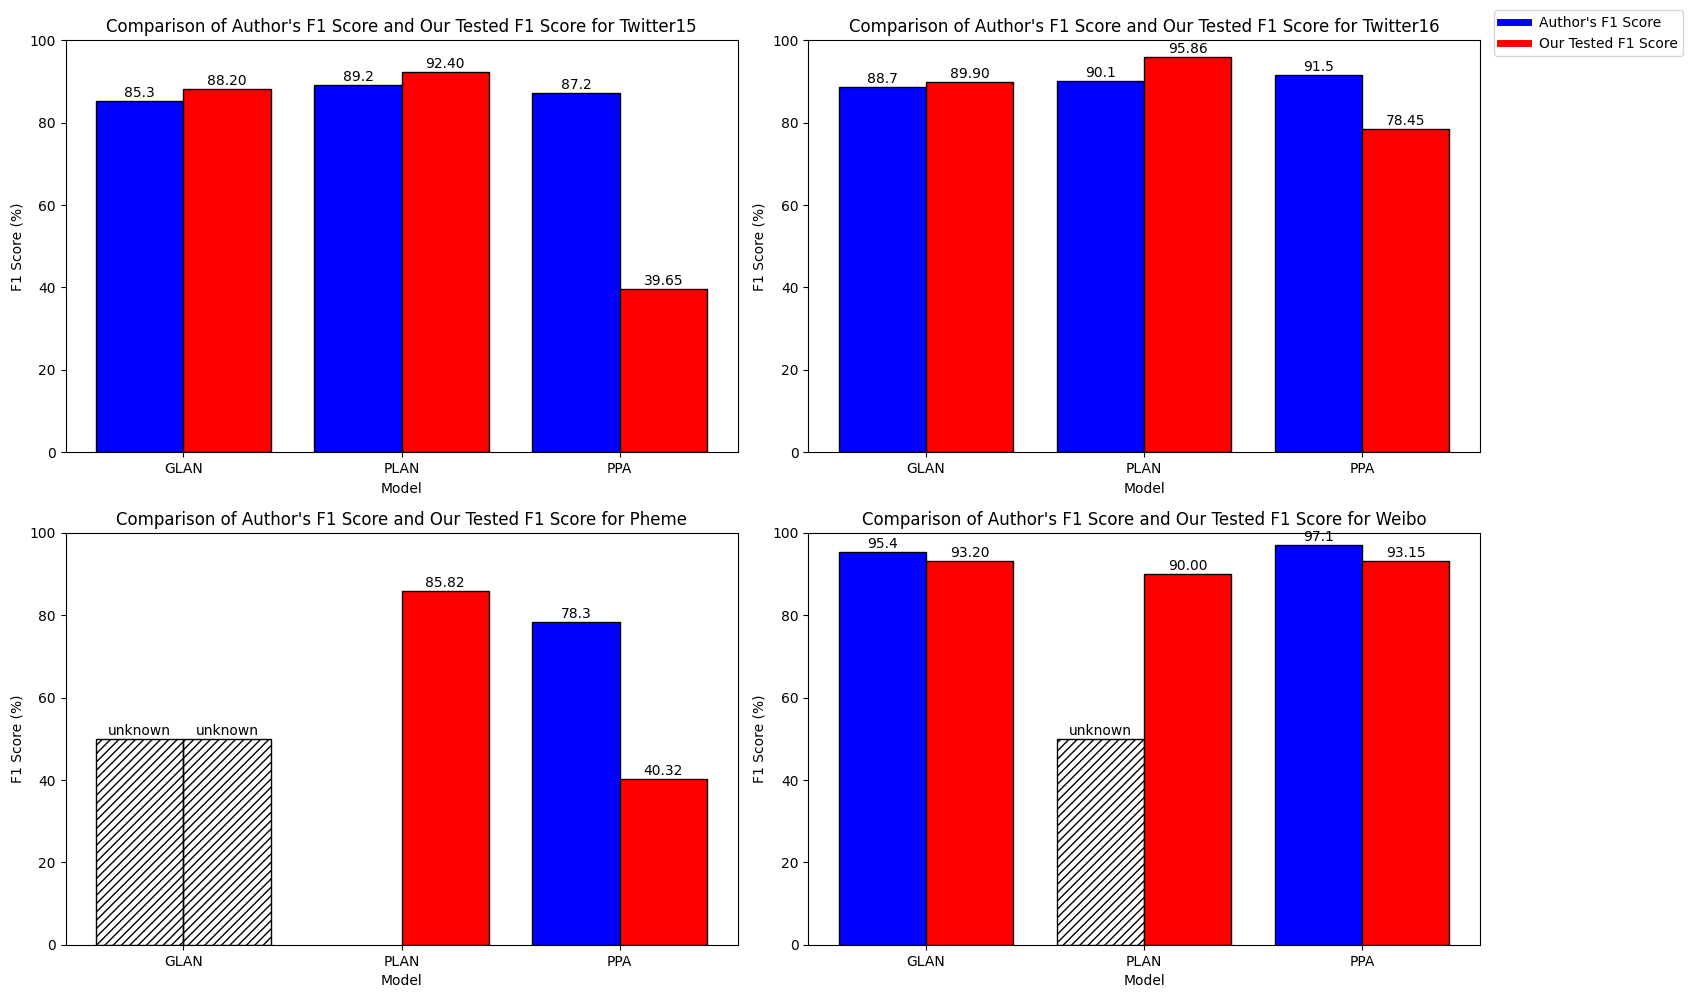

In [173]:
import matplotlib.pyplot as plt
import numpy as np

authors_f1_score = [85.3, 89.2, 87.2, 88.7, 90.1, 91.5, None, 78.3, 95.4, 97.1, None]
our_test_f1_score = [88.2, 92.4, 39.65, 89.9, 95.86, 78.45, 85.82, 40.32, 93.2, 93.15, 90.00]
dataset = ["Twitter15", "Twitter15", "Twitter15", "Twitter16", "Twitter16", "Twitter16", "Pheme", "Pheme", "Weibo", "Weibo", "Weibo"]
model = ["GLAN", "PLAN", "PPA", "GLAN", "PLAN", "PPA", "PLAN", "PPA", "GLAN", "PPA", "PLAN"]

width = 0.4

datasets = ["Twitter15", "Twitter16", "Pheme", "Weibo"]
models = list(set(model))
x = np.arange(len(models))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, dataset_name in enumerate(datasets):
    model_authors_f1 = []
    model_our_test_f1 = []
    for m in models:
        if dataset_name == "Pheme" and m == "GLAN" or dataset_name == "Weibo" and m == "PLAN":
            model_authors_f1.append(None)
            model_our_test_f1.append(None)
            continue
        f1_indices = [j for j in range(len(dataset)) if dataset[j] == dataset_name and model[j] == m]

        authors_f1_vals = [authors_f1_score[k] for k in f1_indices if authors_f1_score[k] is not None]
        our_test_f1_vals = [our_test_f1_score[k] for k in f1_indices if our_test_f1_score[k] is not None]

        if authors_f1_vals:  # Check if the list is not empty
            model_authors_f1.append(sum(authors_f1_vals) / len(authors_f1_vals))
        else:
            model_authors_f1.append(None)

        if our_test_f1_vals:  # Check if the list is not empty
            model_our_test_f1.append(sum(our_test_f1_vals) / len(our_test_f1_vals))
        else:
            model_our_test_f1.append(None)

    row = i // 2
    col = i % 2

        # Create the Author's F1 Score bar chart
    for j, authors_f1_val in enumerate(model_authors_f1):
        if authors_f1_val is not None:
            axs[row, col].bar(x[j] - width/2, authors_f1_val, width, color='blue', edgecolor='black', linewidth=1)
            axs[row, col].text(x[j] - width/2, authors_f1_val + 1, f"{authors_f1_val:.1f}", ha='center')
        elif dataset_name == "Weibo" and models[j] == "PLAN":
            axs[row, col].bar(x[j] - width/2, 50, width, color='none', edgecolor='black', linewidth=1, hatch='////')
            axs[row, col].text(x[j] - width/2, 50 + 1, 'unknown', ha='center')

    # Create the Our Test F1 Score bar chart
    for j, our_test_f1_val in enumerate(model_our_test_f1):
        if our_test_f1_val is not None:
            axs[row, col].bar(x[j] + width/2, our_test_f1_val, width, color='red', edgecolor='black', linewidth=1)
            axs[row, col].text(x[j] + width/2, our_test_f1_val + 1, f"{our_test_f1_val:.2f}", ha='center')
        elif dataset_name == "Weibo" and models[j] == "PLAN":
            axs[row, col].bar(x[j] + width/2, 90, width, color='red', edgecolor='black', linewidth=1)
            axs[row, col].text(x[j] + width/2, 90 + 1, f"{90:.2f}", ha='center')

    if dataset_name == "Pheme":
        axs[row, col].bar(x[models.index('GLAN')] - width/2, 50, width, color='none', edgecolor='black', linewidth=1, hatch='////')
        axs[row, col].text(x[models.index('GLAN')] - width/2, 50 + 1, 'unknown', ha='center')
        axs[row, col].bar(x[models.index('GLAN')] + width/2, 50, width, color='none', edgecolor='black', linewidth=1, hatch='////')
        axs[row, col].text(x[models.index('GLAN')] + width/2, 50 + 1, 'unknown', ha='center')

    axs[row, col].set_ylim(0, 100)
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(models)
    axs[row, col].set_xlabel("Model")
    axs[row, col].set_ylabel("F1 Score (%)")
    axs[row, col].set_title(f"Comparison of Author's F1 Score and Our Tested F1 Score for {dataset_name}")

# Creating a custom legend
authors_f1_artist = plt.Line2D((0, 1), (0, 0), color='blue', linewidth=5, linestyle='-')
our_test_f1_artist = plt.Line2D((0, 1), (0, 0), color='red', linewidth=5, linestyle='-')
unknown_artist = plt.Line2D((0, 1), (0, 0), color='black', linewidth=1, linestyle='--')
fig.legend([authors_f1_artist, our_test_f1_artist, unknown_artist], ["Author's F1 Score", 'Our Tested F1 Score'], loc='upper right',bbox_to_anchor=(1.13, 1))

fig.tight_layout()
plt.savefig('compare_F1.jpg', dpi=300, bbox_inches='tight')
plt.show()


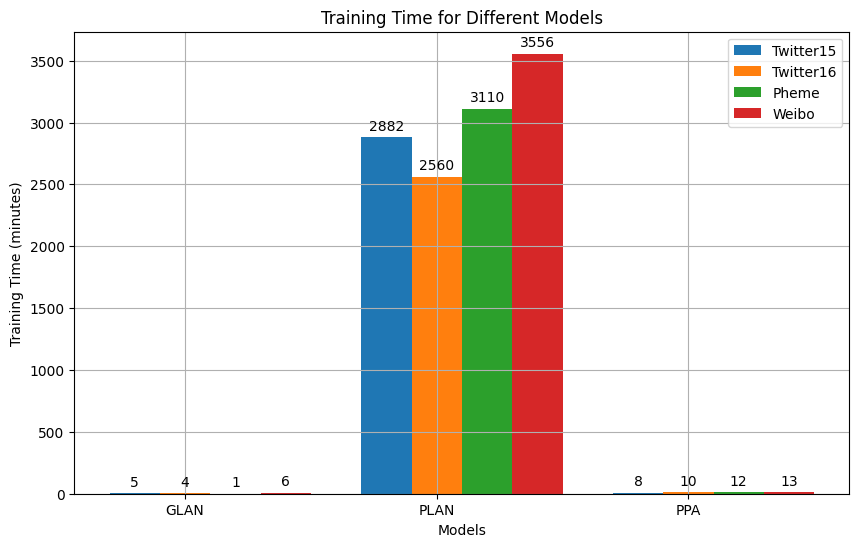

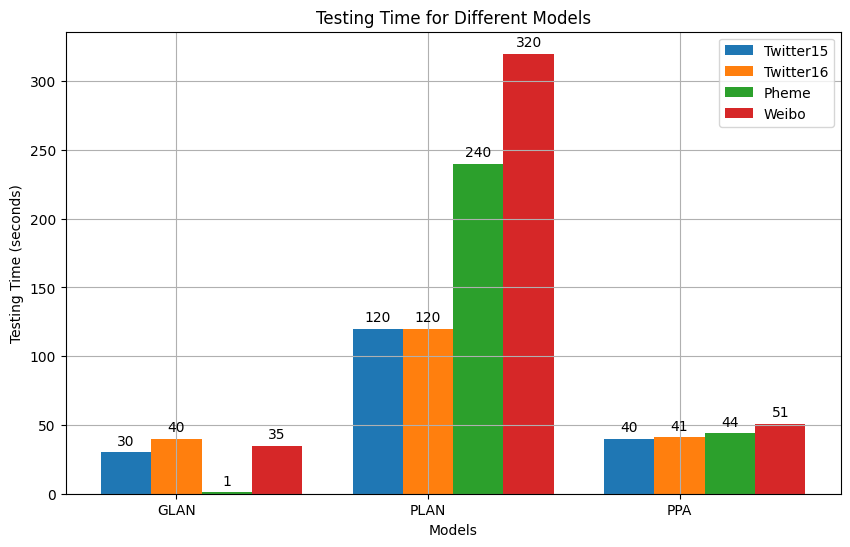

In [312]:
import numpy as np
import matplotlib.pyplot as plt

# Training Time
models = ['GLAN', 'PLAN', 'PPA']
twitter15 = [5, 2882, 8]
twitter16 = [4, 2560, 10]
pheme = [1, 3110, 12]
weibo = [6, 3556, 13]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, twitter15, width, label='Twitter15')
rects2 = ax.bar(x, twitter16, width, label='Twitter16')
rects3 = ax.bar(x + width, pheme, width, label='Pheme')
rects4 = ax.bar(x + 2 * width, weibo, width, label='Weibo')

# Function to label each bar with its respective value
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.set_xlabel('Models')
ax.set_ylabel('Training Time (minutes)')
ax.set_title('Training Time for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True)
plt.savefig('train_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Testing Time
twitter15 = [30, 120, 40]
twitter16 = [40, 120, 41]
pheme = [1, 240, 44]
weibo = [35, 320, 51]

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, twitter15, width, label='Twitter15')
rects2 = ax.bar(x, twitter16, width, label='Twitter16')
rects3 = ax.bar(x + width, pheme, width, label='Pheme')
rects4 = ax.bar(x + 2 * width, weibo, width, label='Weibo')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.set_xlabel('Models')
ax.set_ylabel('Testing Time (seconds)')
ax.set_title('Testing Time for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True)
plt.savefig('test_time.png', dpi=300, bbox_inches='tight')
plt.show()


In [295]:
def plot_hexagonal_chart(datasets, dataset_names, labels, title="Hexagonal Chart",filename="hexagonal_chart.png"):
    assert all(len(data) == 6 for data in datasets), "Each dataset must have exactly 6 data points."
    assert len(labels) == 6, "There must be exactly 6 labels."
    assert len(dataset_names) == len(datasets), "There must be a name for each dataset."

    # Calculate the angles for the hexagon
    angles = np.linspace(0, 2 * np.pi, 6, endpoint=False)

    # Create a figure with a custom size
    plt.figure(figsize=(10, 8))

    # Set up the polar plot
    ax = plt.subplot(111, polar=True)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    # Plot the hexagonal charts
    for data, dataset_name in zip(datasets, dataset_names):
        # Close the polygon by repeating the first data point and angle
        data = np.append(data, data[0])
        plot_angles = np.append(angles, angles[0])

        ax.plot(plot_angles, data, "o-", linewidth=3, markersize=8, label=dataset_name)
        ax.fill(plot_angles, data, alpha=0.25)

    # Set the labels and their positions
    ax.set_xticks(angles)
    ax.set_xticklabels(labels, fontsize=14)

    # Remove radial labels
    ax.set_yticklabels([])

    # Set the title
    plt.title(title, size=24, color="blue", y=1.1)

    # Add a legend
    #ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=14)

    plt.savefig(filename, dpi=300, bbox_inches="tight")


    # Show the plot
    plt.show()


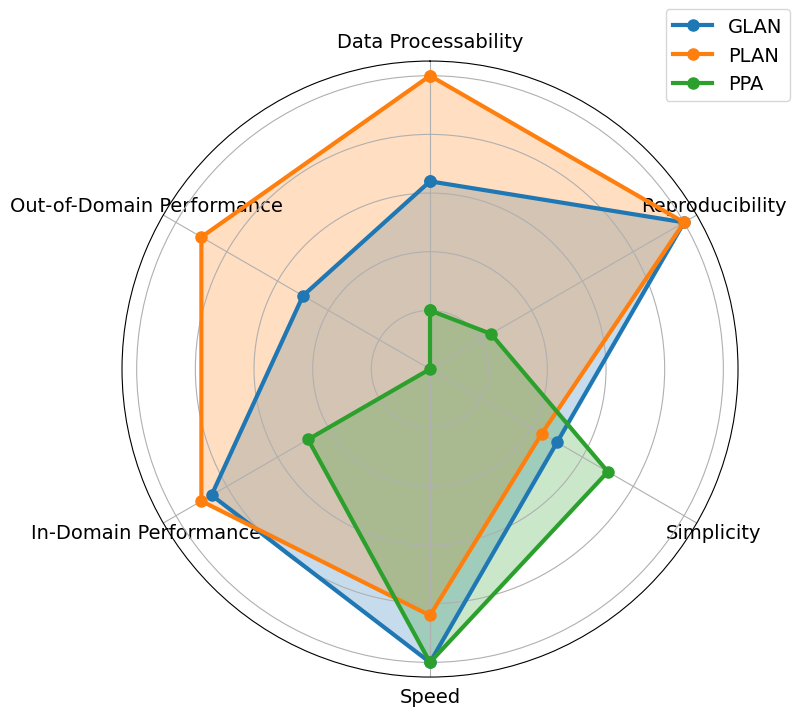

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polygonal_chart(datasets, dataset_names, labels, title="", filename="heptagonal_chart.png"):
    assert all(len(data) == 6 for data in datasets), "Each dataset must have exactly 7 data points."
    assert len(labels) == 6, "There must be exactly 7 labels."
    assert len(dataset_names) == len(datasets), "There must be a name for each dataset."

    # Calculate the angles for the heptagon
    angles = np.linspace(0, 2 * np.pi, 6, endpoint=False)

    # Create a figure with a custom size
    plt.figure(figsize=(10, 8))

    # Set up the polar plot
    ax = plt.subplot(111, polar=True)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    # Plot the heptagonal charts
    for data, dataset_name in zip(datasets, dataset_names):
        # Close the polygon by repeating the first data point and angle
        data = np.append(data, data[0])
        plot_angles = np.append(angles, angles[0])

        ax.plot(plot_angles, data, "o-", linewidth=3, markersize=8, label=dataset_name)
        ax.fill(plot_angles, data, alpha=0.25)

    # Set the labels and their positions
    ax.set_xticks(angles)
    ax.set_xticklabels(labels, fontsize=14)

    # Remove radial labels
    ax.set_yticklabels([])

    # Set the title
    plt.title(title, size=24, color="blue", y=1.1)

    # Add a legend
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=14)

    # Save the plot
    plt.savefig(filename, dpi=300, bbox_inches="tight")

    # Show the plot
    plt.show()

GLAN = [3.2, 5, 2.5, 5, 4.3, 2.5]
PLAN = [5, 5, 2.2, 4.2, 4.5, 4.5]
PPA = [1, 1.2, 3.5, 5, 2.4, 0]
dataset_names = ["GLAN", "PLAN", "PPA"]
labels = ["Data Processability", "Reproducibility", "Simplicity", "Speed", "In-Domain Performance", "Out-of-Domain Performance"]
plot_polygonal_chart([GLAN, PLAN, PPA], dataset_names, labels, filename="Usable Performance.png")


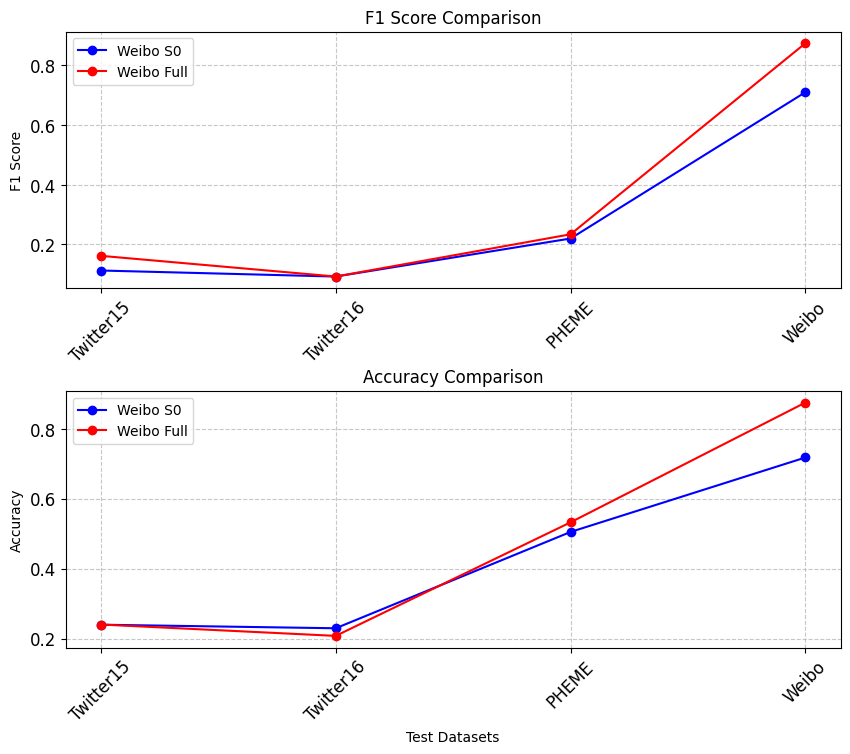

In [96]:
import matplotlib.pyplot as plt

# Define the data
train_datasets = ['Twitter15', 'Twitter16', 'PHEME', 'Weibo']
weibo_s0_f1score = [0.1128, 0.0926, 0.22, 0.710]
weibo_full_f1score = [0.162, 0.0926, 0.2341, 0.874]
weibo_s0_accuracy = [0.23954293, 0.2293491, 0.504875, 0.717795]
weibo_full_accuracy = [0.240070609, 0.207578253, 0.532376, 0.8749611197511]

# Create the plot
fig, axs = plt.subplots(2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)
axs[0].plot(train_datasets, weibo_s0_f1score, '-o', label='Weibo S0', color='blue')
axs[0].plot(train_datasets, weibo_full_f1score, '-o', label='Weibo Full', color='red')
axs[0].set_title('F1 Score Comparison')
axs[0].set_ylabel('F1 Score')
axs[0].legend()

axs[1].plot(train_datasets, weibo_s0_accuracy, '-o', label='Weibo S0', color='blue')
axs[1].plot(train_datasets, weibo_full_accuracy, '-o', label='Weibo Full', color='red')
axs[1].set_title('Accuracy Comparison')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Test Datasets')
axs[1].legend()

# Customize the tick labels and grid
for ax in axs:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelrotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Save the plot to a file
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


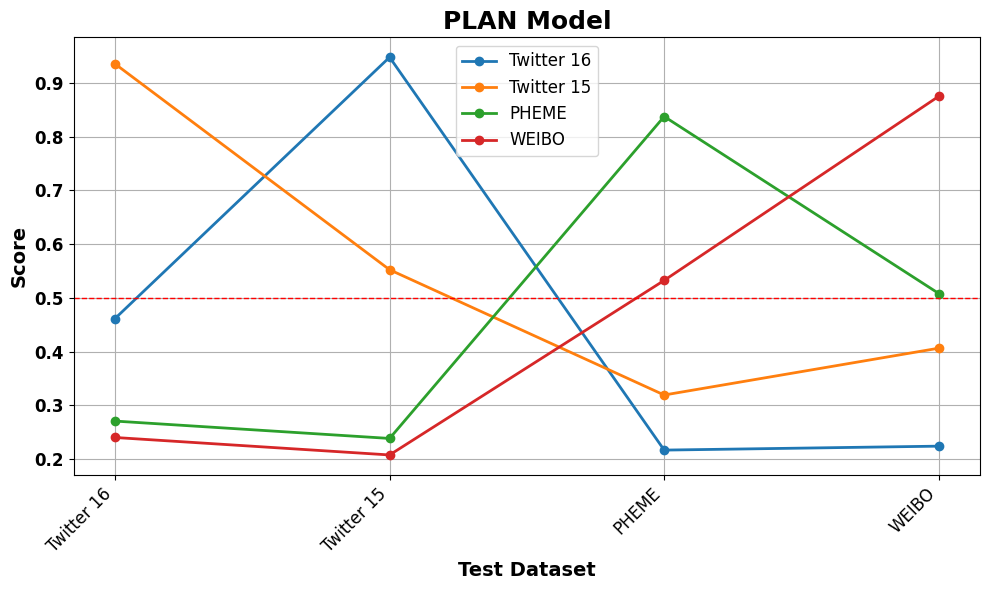

In [11]:
import matplotlib.pyplot as plt

# Define the data
test_datasets = ['Twitter 16', 'Twitter 15', 'PHEME', 'WEIBO']
twitter16_scores = [0.4613, 0.9476, 0.2166, 0.2239502]
twitter15_scores = [0.9353, 0.5522, 0.3191, 0.4062208]
pheme_scores = [0.2706, 0.2383, 0.8373, 0.507931]
weibo_scores = [0.2400706, 0.2075782, 0.532376, 0.8749611]

# Create a function to draw a combined line graph
def draw_combined_line_graph(x, y1, y2, y3, y4):
    plt.figure(figsize=(10, 6)) # Set the figure size
    plt.plot(x, y1, marker='o', label='Twitter 16', linewidth=2)
    plt.plot(x, y2, marker='o', label='Twitter 15', linewidth=2)
    plt.plot(x, y3, marker='o', label='PHEME', linewidth=2)
    plt.plot(x, y4, marker='o', label='WEIBO', linewidth=2)
    plt.axhline(y=0.50, color='red', linestyle='--', linewidth=1)
    plt.title('PLAN Model', fontsize=18, fontweight='bold') # Increase font size and add weight
    plt.xlabel('Test Dataset', fontsize=14, fontweight='bold') # Increase font size and add weight
    plt.ylabel('Score', fontsize=14, fontweight='bold') # Increase font size and add weight
    plt.grid()
    plt.xticks(rotation=45, fontsize=12, ha='right') # Increase font size and adjust label position
    plt.yticks(fontsize=12, fontweight='bold') # Increase font size and add weight
    plt.legend(fontsize=12) # Increase font size of legend
    plt.tight_layout() # Adjust layout
    plt.savefig('combined_line_graph.png', dpi=300, bbox_inches='tight') # Save the graph as a file

# Draw a combined line graph with a dotted line at y=0.50 and save it as a file
draw_combined_line_graph(test_datasets, twitter16_scores, twitter15_scores, pheme_scores, weibo_scores)


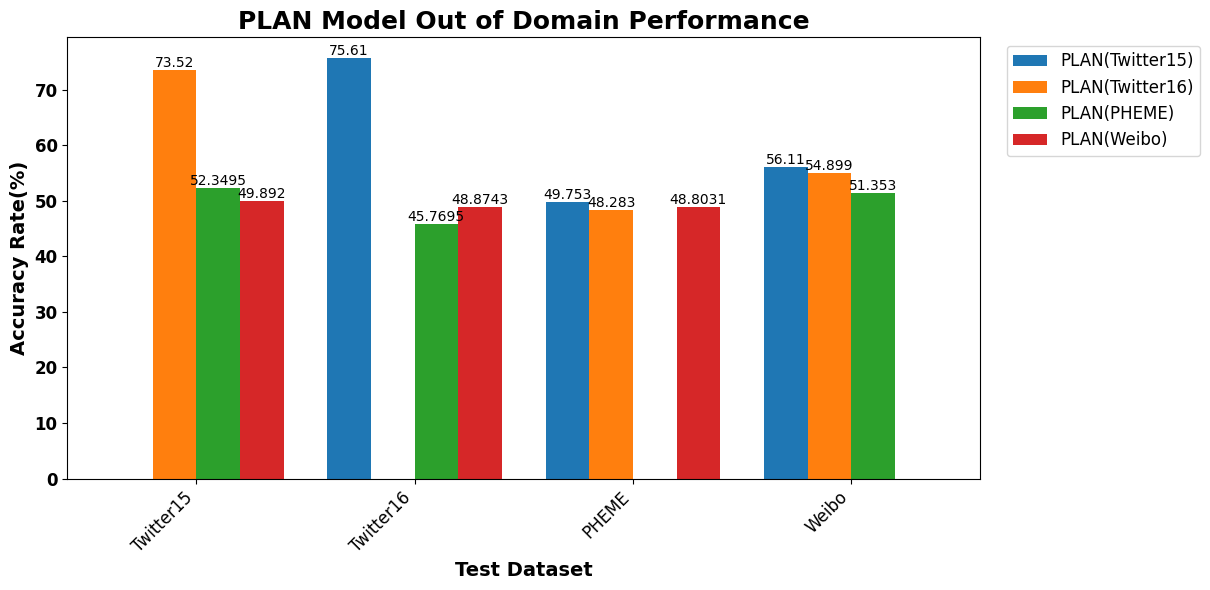

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
train_datasets = ['Twitter15', 'Twitter16', 'PHEME', 'Weibo']
test_datasets = ['Twitter15', 'Twitter16', 'PHEME', 'Weibo']

f1_scores = {
    'Twitter15': {
        'Twitter15': 94.230893,
        'Twitter16': 75.61000,
        'PHEME': 49.753,
        'Weibo': 56.11
    },
    'Twitter16': {
        'Twitter15': 73.519964,
        'Twitter16': 95.64152,
        'PHEME': 48.283,
        'Weibo': 54.899
    },
    'PHEME': {
        'Twitter15': 52.349529,
        'Twitter16': 45.76954,
        'PHEME':  84.89785,
        'Weibo': 51.35303
    },
    'Weibo': {
        'Twitter15': 49.892044,
        'Twitter16': 48.8743,
        'PHEME': 48.8031,
        'Weibo': 87.49611
    }
}

# Remove highest scores
for train_dataset in train_datasets:
    max_key = max(f1_scores[train_dataset], key=f1_scores[train_dataset].get)
    f1_scores[train_dataset][max_key] = 0

def draw_combined_bar_chart(x, scores):
    # Set up the bar chart properties
    bar_width = 0.2
    n = len(x)
    index = np.arange(n)

    plt.figure(figsize=(10, 6)) # Set the figure size

    # Create bars for each train dataset
    for i, train_dataset in enumerate(train_datasets):
        y = [scores[train_dataset][test_dataset] for test_dataset in test_datasets]
        bars = plt.bar(index + i*bar_width, y, bar_width, label='PLAN(' + train_dataset + ')')

        # Function to add labels on top of bars
        def add_labels(bars):
            for bar in bars:
                height = bar.get_height()
                if height != 0: # Do not label the removed bars
                    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, round(height, 4),
                             ha='center', va='bottom', fontsize=10)

        add_labels(bars)

    plt.title('PLAN Model Out of Domain Performance', fontsize=18, fontweight='bold') # Increase font size and add weight
    plt.xlabel('Test Dataset', fontsize=14, fontweight='bold') # Increase font size and add weight
    plt.ylabel('Accuracy Rate(%)', fontsize=14, fontweight='bold') # Increase font size and add weight
    plt.xticks(index + 1.5*bar_width, x, rotation=45, fontsize=12, ha='right') # Increase font size and adjust label position
    plt.yticks(fontsize=12, fontweight='bold') # Increase font size and add weight
    plt.legend(fontsize=12) # Increase font size of legend
    plt.tight_layout() # Adjust layout
    plt.grid(False)  # Remove grid



# Draw a combined bar chart without the highest bar in each group and with data labels on top of each bar
draw_combined_bar_chart(test_datasets, f1_scores)
plt.legend(fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.savefig('PLAN Out of Domain Performance_Acc.png', dpi=300, bbox_inches='tight') # Save the graph as a file


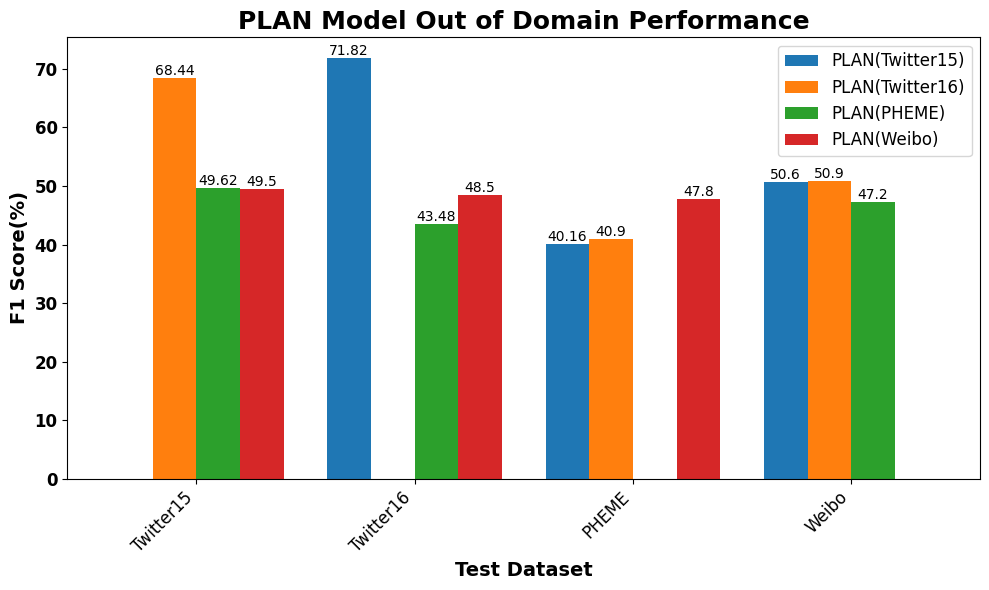

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
train_datasets = ['Twitter15', 'Twitter16', 'PHEME', 'Weibo']
test_datasets = ['Twitter15', 'Twitter16', 'PHEME', 'Weibo']

f1_scores = {
    'Twitter15': {
        'Twitter15': 92.58,
        'Twitter16': 71.82,
        'PHEME': 40.16,
        'Weibo': 50.6
    },
    'Twitter16': {
        'Twitter15': 68.44,
        'Twitter16': 94.6,
        'PHEME': 40.9,
        'Weibo': 50.9
    },
    'PHEME': {
        'Twitter15': 49.62,
        'Twitter16': 43.48,
        'PHEME':  87.12,
        'Weibo': 47.2
    },
    'Weibo': {
        'Twitter15': 49.5,
        'Twitter16': 48.5,
        'PHEME': 47.8,
        'Weibo': 87.4
    }
}

# Remove highest scores
for train_dataset in train_datasets:
    max_key = max(f1_scores[train_dataset], key=f1_scores[train_dataset].get)
    f1_scores[train_dataset][max_key] = 0

def draw_combined_bar_chart(x, scores):
    # Set up the bar chart properties
    bar_width = 0.2
    n = len(x)
    index = np.arange(n)

    plt.figure(figsize=(10, 6)) # Set the figure size

    # Create bars for each train dataset
    for i, train_dataset in enumerate(train_datasets):
        y = [scores[train_dataset][test_dataset] for test_dataset in test_datasets]
        bars = plt.bar(index + i*bar_width, y, bar_width, label='PLAN(' + train_dataset + ')')

        # Function to add labels on top of bars
        def add_labels(bars):
            for bar in bars:
                height = bar.get_height()
                if height != 0: # Do not label the removed bars
                    plt.text(bar.get_x() + bar.get_width()/2, height + 0.001, round(height, 4),
                             ha='center', va='bottom', fontsize=10)

        add_labels(bars)

    plt.title('PLAN Model Out of Domain Performance', fontsize=18, fontweight='bold') # Increase font size and add weight
    plt.xlabel('Test Dataset', fontsize=14, fontweight='bold') # Increase font size and add weight
    plt.ylabel('F1 Score(%)', fontsize=14, fontweight='bold') # Increase font size and add weight
    plt.xticks(index + 1.5*bar_width, x, rotation=45, fontsize=12, ha='right') # Increase font size and adjust label position
    plt.yticks(fontsize=12, fontweight='bold') # Increase font size and add weight
    plt.legend(fontsize=12) # Increase font size of legend
    plt.tight_layout() # Adjust layout
    plt.grid(False)  # Remove grid
    plt.savefig('PLAN Out of Domain Performance_F1.png', dpi=300, bbox_inches='tight') # Save the graph as a file

# Draw a combined bar chart without the highest bar in each group and with data labels on top of each bar
draw_combined_bar_chart(test_datasets, f1_scores)



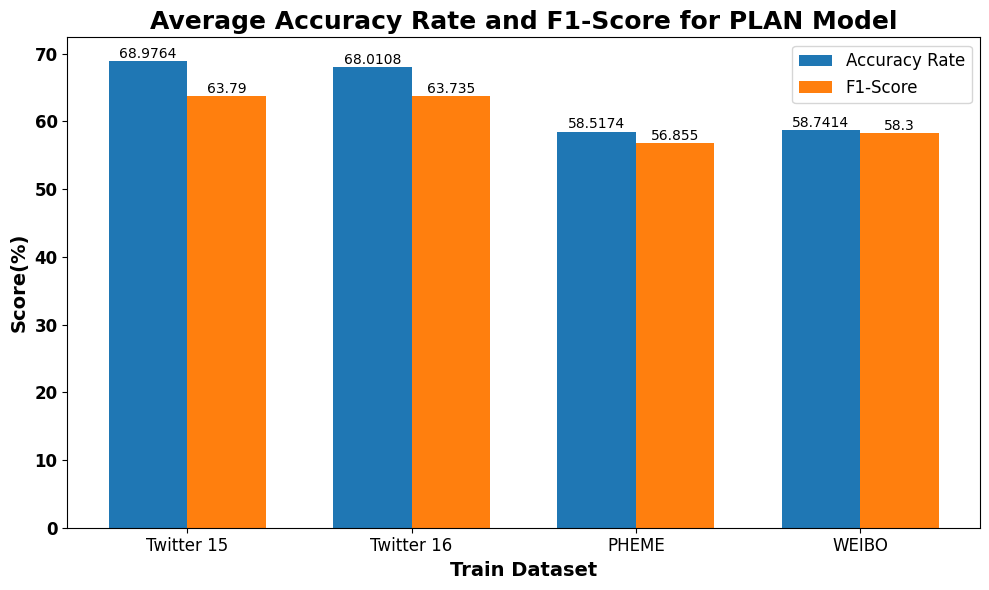

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
train_datasets = ['Twitter 15', 'Twitter 16', 'PHEME', 'WEIBO']
accuracy_rate = [68.97640325, 68.0107535, 58.517412, 58.741364]
f1_score = [63.79, 63.735, 56.855, 58.3]

def draw_accuracy_f1_chart(x, y1, y2):
    n = len(x)
    index = np.arange(n)

    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.35
    bars1 = ax.bar(index, y1, bar_width, label='Accuracy Rate')
    bars2 = ax.bar(index + bar_width, y2, bar_width, label='F1-Score')

    # Function to add labels on top of bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, round(height, 4),
                     ha='center', va='bottom', fontsize=10)

    # Mark the highest value for Accuracy Rate and F1 Score
    max_acc_index = y1.index(max(y1))
    max_f1_index = y2.index(max(y2))

    add_labels(bars1)
    add_labels(bars2)

    plt.title('Average Accuracy Rate and F1-Score for PLAN Model', fontsize=18, fontweight='bold')
    plt.xlabel('Train Dataset', fontsize=14, fontweight='bold')
    plt.ylabel('Score(%)', fontsize=14, fontweight='bold')
    # Remove the grid
    # plt.grid()
    plt.xticks(index + bar_width / 2, x, fontsize=12, ha='center')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig('average_accuracy_f1.png', dpi=300, bbox_inches='tight')

# Draw a bar chart showing both the accuracy rate and F1 score in one image
draw_accuracy_f1_chart(train_datasets, accuracy_rate, f1_score)


In [323]:
import json
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import matplotlib

# Use 'SimHei' font to display Chinese characters correctly
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'

file_path = "/home/ame/rumor/PLAN/codes/data/weibo/weibo_full_data_repair.json"
tweets = []
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        json_data = json.loads(line.strip())
        tweets.extend(json_data["tweets"])

seg_tweets = []
for text in tweets:
    seg_tweets.append(" ".join(jieba.cut(text)))

vectorizer = CountVectorizer(stop_words=["的", "了", "是", "在", "有", "和", "对", "我", "你", "他"])
word_count_matrix = vectorizer.fit_transform(seg_tweets)

word_counts = Counter()
for word, idx in vectorizer.vocabulary_.items():
    word_counts[word] = word_count_matrix[:, idx].sum()

keywords_df = pd.DataFrame(word_counts.items(), columns=["keyword", "count"])
keywords_df.sort_values("count", ascending=False, inplace=True)
keywords_df.reset_index(drop=True, inplace=True)

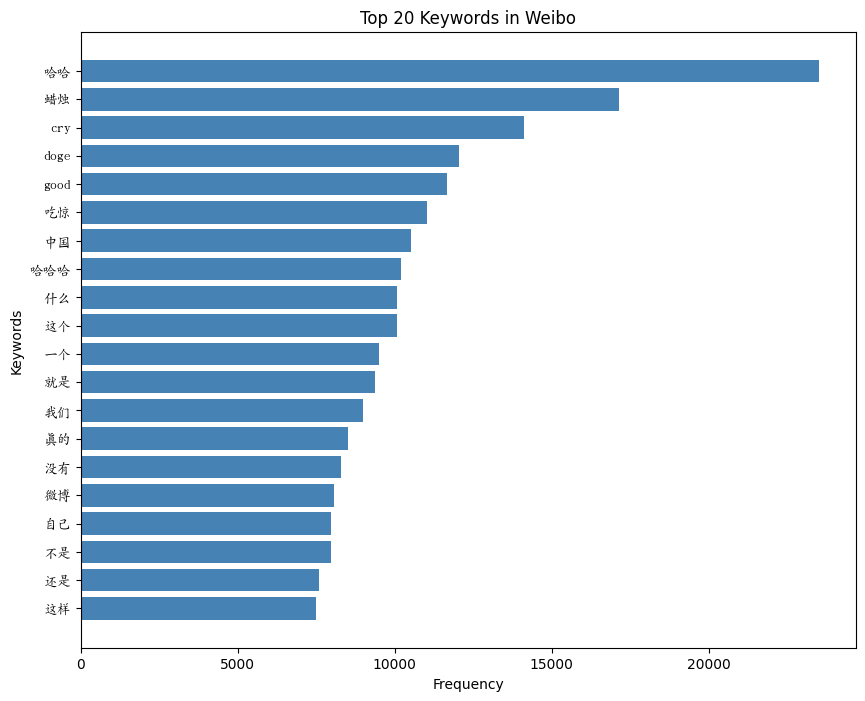

In [324]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Set the font properties. Replace '/usr/share/fonts/truetype/arphic/ukai.ttc'
# with the path to a Chinese font file on your system.
font = FontProperties(fname='/usr/share/fonts/truetype/arphic/ukai.ttc')

top_20_keywords = keywords_df.head(20)

plt.figure(figsize=(10,8))
plt.barh(top_20_keywords['keyword'], top_20_keywords['count'], color='steelblue')

plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords in Weibo')

# Apply the font properties to the ytick labels
plt.yticks(fontproperties=font)

plt.savefig('weibo_keywords_frequency.png', dpi=300, bbox_inches='tight')
plt.show()


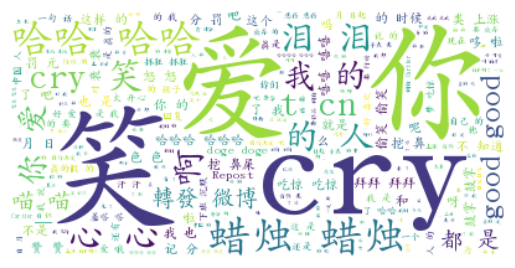

In [260]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object and specify the font path to the Chinese font.
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/arphic/ukai.ttc', background_color='white').generate(" ".join(seg_tweets))

# Display the generated word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('weibo_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()


In [287]:
import json
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

file_path = "/home/ame/rumor/PLAN/codes/data/twitter15_16/twitter16/Twitter16_full.json"
tweets = []
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        json_data = json.loads(line.strip())
        tweets.extend(json_data["tweets"])



with open(file_path, "r") as file:
    for line in file:
        json_data = json.loads(line.strip())
        tweets.extend(json_data["tweets"])

vectorizer = CountVectorizer(stop_words="english")
word_count_matrix = vectorizer.fit_transform(tweets)

word_counts = Counter()
for word, idx in vectorizer.vocabulary_.items():
    word_counts[word] = word_count_matrix[:, idx].sum()

keywords_df = pd.DataFrame(word_counts.items(), columns=["keyword", "count"])
keywords_df.sort_values("count", ascending=False, inplace=True)
keywords_df.reset_index(drop=True, inplace=True)

        keyword  count
0          http  32396
1   bbcbreaking  11370
2         https  11040
3    whitehouse  10882
4         potus   8752
5        cnnbrk   6584
6       foxnews   6414
7          just   5336
8       bbcnews   5230
9          like   4922
10         espn   4684
11          cnn   4456
12          don   4134
13       people   4068
14          amp   3864
15         good   3742
16           rt   3694
17       spider   3248
18      eonline   3152
19          abc   2960


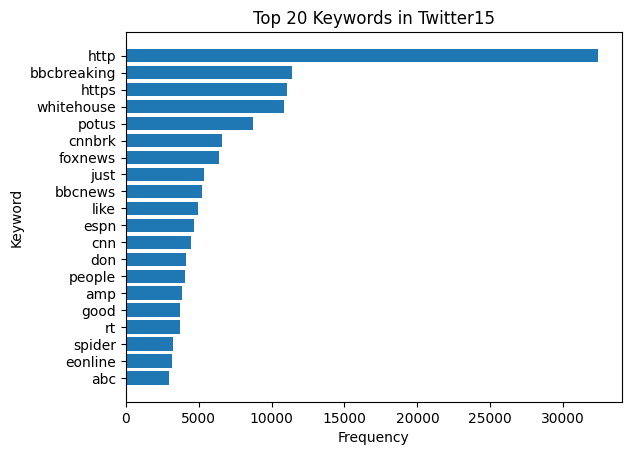

In [285]:
print(keywords_df.head(20))
top_keywords = keywords_df.head(20)
plt.barh(top_keywords["keyword"], top_keywords["count"])
plt.gca().invert_yaxis()
plt.title("Top 20 Keywords in Twitter16")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.savefig('twitter16_keywords.png', dpi=300, bbox_inches='tight')
plt.show()

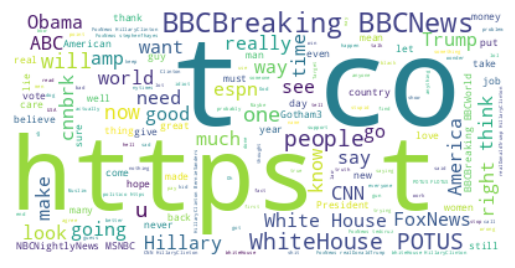

In [288]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white").generate(" ".join(tweets))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('twitter16_wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()


In [241]:
import json
import nltk

nltk.download('punkt')  # download the Punkt tokenizer

unique_words = set()

with open("/home/ame/rumor/PLAN/codes/data/twitter15_16/twitter16/Twitter16_full.json", 'r') as f:
    for line_number, line in enumerate(f, 1):
        try:
            data = json.loads(line)  # load json data from each line
            tweets = data['tweets']
            for tweet in tweets:
                words = nltk.word_tokenize(tweet)  # tokenize the tweet into words
                unique_words.update(words)  # add each word to the set
        except json.JSONDecodeError:
            print(f"Couldn't decode JSON for line {line_number}. Skipping.")

print(len(unique_words))  # print the number of unique words


[nltk_data] Downloading package punkt to /home/ame/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


34498


[nltk_data] Downloading package punkt to /home/ame/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


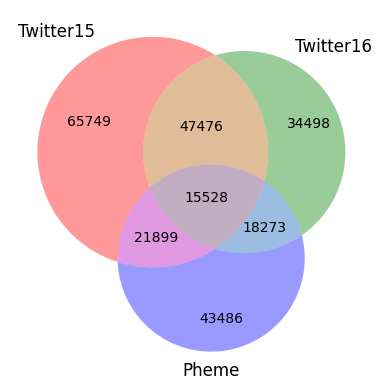

In [5]:
import json
import nltk
from collections import Counter
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# If you have not downloaded the NLTK Punkt Tokenizer, uncomment the next line to download it
nltk.download('punkt')

def extract_words(file_path):
    words = Counter()
    with open(file_path, 'r') as file:
        for line in file:
            try:
                data = json.loads(line)
                for text in data['tweets']:
                    # Use NLTK's word_tokenize to split the sentence into words
                    words.update(nltk.word_tokenize(text))
            except json.JSONDecodeError:
                print(f"Error decoding JSON from {file_path}")
    return words

# Extract words from all three documents
words_doc1 = extract_words("/home/ame/rumor/PLAN/codes/data/twitter15_16/twitter15/Twitter15_full.json")
words_doc2 = extract_words("/home/ame/rumor/PLAN/codes/data/twitter15_16/twitter16/Twitter16_full.json")
words_doc3 = extract_words("/home/ame/rumor/PLAN/codes/data/pheme/pheme_full.json")

# Find overlapping and non-overlapping words
overlapping_words_1_2 = words_doc1 & words_doc2
overlapping_words_1_3 = words_doc1 & words_doc3
overlapping_words_2_3 = words_doc2 & words_doc3
overlapping_words_all = words_doc1 & words_doc2 & words_doc3

non_overlapping_words = (words_doc1 | words_doc2 | words_doc3) - overlapping_words_all

# Draw the Venn diagram
venn3(subsets=(len(words_doc1), len(words_doc2), len(words_doc1)-len(overlapping_words_1_2),
               len(words_doc3), len(words_doc2)-len(overlapping_words_2_3),
               len(overlapping_words_1_2), len(overlapping_words_1_3), len(overlapping_words_2_3),
               len(overlapping_words_all)),
      set_labels=('Twitter15', 'Twitter16', 'Pheme'))
plt.savefig('Venn_Diagram.png', dpi=300, bbox_inches='tight')
plt.show()


In [224]:
import json

def merge_json_files(file_paths, output_file_path):
    with open(output_file_path, 'w') as outfile:
        for file_path in file_paths:
            with open(file_path, 'r') as infile:
                for line in infile:
                    outfile.write(line)

# Create a list of file paths to merge
file_paths = [f"/home/ame/rumor/PLAN/codes/data/twitter15_16/twitter16/Vn-graph/twitter16-{i}.json" for i in range(15)]

# Define the output file path
output_file_path = "/home/ame/rumor/PLAN/codes/data/twitter15_16/twitter16/Vn-graph/merged_twitter16.json"

# Merge the JSON files
merge_json_files(file_paths, output_file_path)


In [235]:
import json

unique_jsons = set()

with open("/home/ame/rumor/PLAN/codes/data/pheme/Vn-graph/merged_pheme.json", 'r') as f_in:
    for line in f_in:
        unique_jsons.add(line)  # This will remove duplicates because sets only allow unique items.

with open("/home/ame/rumor/PLAN/codes/data/pheme/Vn-graph/pheme_full.json", 'w') as f_out:
    for unique_json in unique_jsons:
        f_out.write(unique_json)
